Let's apply a Dimensionality Reduction using PCA. Then, in the modeling process I'll compare between the datasets using PCA and the one with features selected to finally decide which model works better.

_To use this algorithm, I'll use numeric columns of the original dataset_

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
dir_in = "C:/Users/barre/Desktop/Machine Learning/projects/bank/in/{}"

In [3]:
df = pd.read_csv(dir_in.format('BankData.csv'))
df.sample(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
3415,827970933,Existing Customer,46,F,4,Graduate,Married,Less than $40K,Blue,42,4,2,3504.0,1698,4439,70
5703,720281508,Existing Customer,44,F,2,Doctorate,Divorced,Less than $40K,Blue,34,3,1,2406.0,1491,4625,91
26,720466383,Existing Customer,59,M,1,High School,Unknown,$40K - $60K,Blue,46,4,1,14784.0,1374,1197,23


In [5]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object

In [11]:
df['CLIENTNUM'] = df['CLIENTNUM'].astype('object')

In [12]:
numeric = (df.dtypes == 'int64') | (df.dtypes == 'float64')

In [13]:
mask = [el for el in numeric.index if numeric[el]]
df_num = df[mask]

In [14]:
df_num.head(2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,45,3,39,5,1,12691.0,777,1144,42
1,49,5,44,6,1,8256.0,864,1291,33


In [17]:
df_num.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct'],
      dtype='object')

In [18]:
# managing outliers on Month_Inactive_12_mon (same as preprocessing.ipynb)
mask = (df_num['Months_Inactive_12_mon'] < 5) & (df_num['Months_Inactive_12_mon'] > 0.5)
df_num = df_num[mask]

In [24]:
# in PCA we must work with standarized values
df_scaled = StandardScaler().fit_transform(df_num)
df_scaled

array([[-0.15603865,  0.50218374,  0.40065966, ..., -0.47680556,
        -0.95822465, -0.97028562],
       [ 0.343489  ,  2.04165859,  1.0307547 , ..., -0.36992621,
        -0.91501112, -1.35311621],
       [ 0.59325282,  0.50218374,  0.02260263, ..., -1.43134871,
        -0.73980522, -1.90609373],
       ...,
       [-0.28092056, -1.03729112,  0.02260263, ..., -1.43134871,
         1.73071557, -0.20462444],
       [-2.02926731, -0.26755369,  0.02260263, ..., -1.43134871,
         1.17334914, -0.11955097],
       [-0.40580247, -0.26755369, -1.36360646, ...,  0.97773639,
         1.73159747, -0.1620877 ]])

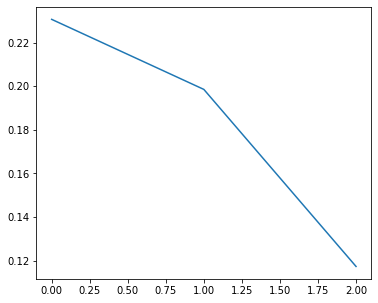

In [25]:
pca = PCA(n_components=3)

pca.fit(df_scaled)
X_pca = pca.fit_transform(df_scaled)

# checking variance
plt.figure(figsize=(6, 5))
plt.plot(range(len(pca.explained_variance_)),
         pca.explained_variance_ratio_);

First feature represents more than 22% of the information, the second one near 20% and the last one less than 12%

# Saving

In [33]:
df_clean = pd.read_csv(dir_in.format('data_processed.csv'))
df_clean.sample(3)

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,gender_F,gender_M,marital_Divorced,marital_Married,marital_Single,marital_Unknown,Target
4258,715762083,46,0,1,3,2,36,6,3,30501.0,2030,2525,45,0,1,0,0,1,0,1
3299,713343333,42,3,0,2,1,29,4,3,6698.0,1327,4065,77,0,1,0,1,0,0,1
8429,812618883,47,2,2,0,2,42,1,2,34516.0,2019,7774,95,0,1,1,0,0,0,1


In [35]:
X = pd.DataFrame(X_pca, columns=['f1', 'f2', 'f3'])
y = df_clean['Target']

In [38]:
df_pca = pd.concat([X, y], axis=1)
df_pca.head(2)

,f1,f2,f3,Target
0,-1.236407,-0.503494,0.910693,1
1,-1.827758,-0.191032,1.080123,1


In [39]:
df_pca.to_csv(dir_in.format('data_pca.csv'), sep=',', index=False)